# Introduction to Keras Lab

## Objective

In this lab, we'll learn how to use Keras-- an industry standard tool to build for quickly prototyping and training Deep Neural Networks.

## Introduction 

In the last lab, we learned how to build a small neural network from scratch, with only numpy to help.  While this was illuminating to help us learn how Artificial Neural Networks actually work, the construction of it was a bit too tedious for real-world data scientists to do on the job. Because of this, many great frameworks and libraries have been created to make it a simple task to build a neural network--Keras, and TensorFlow!
<table>
<tr>
    <td><a href="https://www.tensorflow.org"><img src='tensorflow-logo.png' height=100% width=100%></a></td>
    <td><a href="https://keras.io/"><img src='keras-logo.png' height=75% width=75%></a></td>
</tr>
</table>
    
## A Bit of Background

If we're going to talk about Keras, we'll first need to talk about TensorFlow.  Keras and TensorFlow are both created and maintained by Google.  TensorFlow is a framework for building **_Static Computational Graphs_**, with a special emphasis on Deep Learning.  It provides much of the same functionality of numpy, but with a ton of common functionality needed for neural networks already created. Since working with TensorFlow can be a bit involved, Keras was invented as a high-level API for building Neural Networks with TensorFlow as a backend.  When you're using Keras, you're still using TensorFlow--you just don't have to write any TensorFlow code directly.

The biggest benefit of using TensorFlow or Keras is that they provide [Auto Differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) by default, which means that we don't actually have to handle Back Propagation, or caching any of the intermediate values during our forward propagation step so that we can use them later in back prop.  This is just one of the many reasons you'll love working with these tools!

## Getting Started

We'll start by building a small MLP with Keras.  Run the cell below to import everything we'll need for this lab.

In [1]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

/Users/arihorwitz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## The Data Set

In this lab, we'll be working with the MNIST dataset.  This dataset is a collection of handwritten digits, 0 through 9.  Each image is black and white, 28 pixel high, 28 pixels wide, and comes with a label.  From a historical perspective, this dataset has incredible significance to the Deep Learning community.  These days, it is treated as the "Hello, World!" of Deep Learning.  

We'll have to do some basic data preparation in order to load in our data and get it in a shape usable by a Neural Network. 

In the cell below, call `mnist.load_data()` to store our data in the tuples we've laid out. You'll note that it's already been split into training and testing sets. 

**_NOTE:_** If this is your time ever running this on your computer, Keras will have to download the images from the internet.  This is a large dataset, and the download could take a while.  Be patient!

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's inspect a sample image to see what one of the images looks like.  

In the cell below, call `plt.imshow()` and pass in the first item from `X_train`.

Label: 5


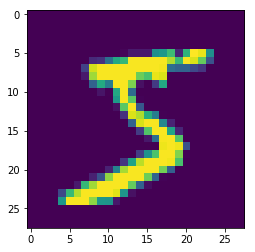

In [3]:
plt.imshow(X_train[0])

print("Label: {}".format(y_train[0]))

a 5! A somewhat sloppy 5, but still a 5.  After a few short lines of code, we'll have built and trained a neural network that is able to recognize this as a 5.  Let's take a look at the way raw data for the first sample. 

In the cell below, access `X_train[0]` to see what it looks like.

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Our image is a 28x28 matrix.  In plain English, that means that it's an array containing 28 arrays, with each inner array containing 28 integer values between 0 and 255.  

In order for us to feed this into a neural network, we'll need to reshape this from a matrix into a vector.  This is a basic step needed for most image preparation (except when we're building a Convolutional Neural Network--more on that in a later lab!).  

In the cell below, we'll reshape `X_train` and `X_test` using their built in `.reshape()` methods. 

`X_train` contains 60,000 samples of shape `(28,28)`--so we'll reshape it to `(60000, 784)`.  We'll also method chain to cast the data inside of it from type `int8` to `float32`.  

`X_test` contains only 10,000 samples, so we'll reshape that to `(10000, 784)`.  We'll also cast this to type `float32`.  

In [5]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

While we're preprocessing our data, it's also a good idea to normalize it.  Normally, this would involve subtracting the mean and dividing by the standard deviation for each column, or using a `StandardScaler()` object from sklean.  However, since we're working with image data, we can use a quick hack and just divide every value by 255. 

In the cell below, normalize the data in `X_train` and `X_test` by dividing each by 255.

In [6]:
X_train /= 255
X_test /= 255

We've successfully pre-processed our data, but we still need to deal with our labels, which are inside of `y_train` and `y_test`.  This is much easier--we need to change the data from its current categorical form to a one-hot encoded format.  Keras makes this easy by providing a `to_categorical()` function inside of its `utils` module.

In the cell below, call `keras.utils.to_categorical()` and pass in the variable containing the labels to be reshaped as the first parameter.  For the second parameter, pass in the number of categories the data contains--in this case, `10`. 

In [7]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

Great! We've now successfully preprocessed our data so that it's ready for use in a neural network!

## Building a Neural Network with Keras

Let's start by building our neural network. This means we need to create a `Sequential()` object.  This is an empty neural network that hasn't had any layers added to it yet.  

Our workflow in Keras will consist of of the following:

* Create a `Sequential` object
* Add the layers we want to our `Sequential` object. When defining the first hidden layer, we'll also define our input layer.  
* Compile our model
* Fit our model
* Examine the results!

Let's get started! In the cell below, create a `Sequential()` object.

In [8]:
model = Sequential()

Now, we can add layers to our model by passing them in to the model's `.add()` method.  There are a ton of different kinds of layers we can add to our model, but for this lab we'll keep it simple and only use a single `Dense()` layer. 



There are several parameters we'll need to pass in to the `Dense()` layer we're creating at each step, to define exactly how we want our Dense layer to be shaped.  We'll need to tell the first layer the following things:

* The number of neurons in the layer
* The activation function of the layer (although this can also be added using `model.add()`, it's easier to just pass it in as a keyword parameter when creating the `Dense` layer)
* If the layer we're creating is the first hidden layer, we'll also need to tell it the shape of the input layer.  In this case, we'll do that by passing in the keyword parameter `input_shape=(784,)`.

In the cell below:

* Call `model.add()` and pass in a `Dense` layer with `25` neurons.  Also set the activation to `"sigmoid"`, and the input shape to `(784,)`
* Call `model.add()` again to create out output layer.  This time, pass in a `Dense` layer with `10` neurons (one for each possible class that it can predict).  This time, set the activation to `"softmax"`. 

In [10]:
model.add(Dense(25, activation='sigmoid',  input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Great! With 2 lines of code, we've now created a complex neural network capable of reading human handwriting!

Let's look at the structure of the model we've just created. 

In the cell below, call `model.summary()`.

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


Note that the summary of our model doesn't show the input layer by default. This is a common convention in Deep Learning, since the input layer doesn't contain any **_trainable parameters_**, meaning that it doesn't really do anything.  

Also note the number of trainable parameters in our network--19,885! Although this may seem like a lot, its still quite small compared to typical Artificial Neural Networks used in Deep Learning.  

Now, we need to compile our model.  This is a step unique to Keras, where the neural network we've created is actually created as a static computational graph in TensorFlow.  During this step, we'll need to pass in certain some information. Specifically:

* We'll need to specify the loss.  Since this is a multi-categorical problem, we'll set the `loss` to `"categorical_crossentropy"`.
* We'll also need to tell the model what type of optimizer we'll use.  In this case, set the `optimzer` to `"SGD"`, which is short for **_Stochastic Gradient Descent_**.
* Finally, we'll need to tell the model what metrics we want back.  In this case, we'll pass in `["accuracy"]` to the `metrics` keyword argument.

In [12]:
model.compile(loss='categorical_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

Now, the fun part--we can actually fit our model, and see how well it does! 

Just like the last step, there are multiple parameters we'll need to pass in, such as:

* `X_train` and `y_train`
* a `batch_size` of `32`
* The number of `epochs`, which we'll set to `10`.
* Set `verbose` to `1`, so that we'll get messages as the model trains. 
* We'll also pass in `validation_data` to the tuple`(X_test, y_test)`.  With this, the model will compute the accuracy on our validation set at the end of each epoch.  

In [13]:
model = model.fit(X_train, y_train, batch_size=32,epochs=10,verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 268us/step - loss: 1.6882 - acc: 0.6323 - val_loss: 1.1826 - val_acc: 0.7705
Epoch 2/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.9518 - acc: 0.8052 - val_loss: 0.7672 - val_acc: 0.8433
Epoch 3/10
60000/60000 [==============================] - 14s 237us/step - loss: 0.6847 - acc: 0.8503 - val_loss: 0.5948 - val_acc: 0.8677
Epoch 4/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.5597 - acc: 0.8704 - val_loss: 0.5039 - val_acc: 0.8843
Epoch 5/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.4883 - acc: 0.8815 - val_loss: 0.4484 - val_acc: 0.8914
Epoch 6/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.4423 - acc: 0.8891 - val_loss: 0.4115 - val_acc: 0.8967
Epoch 7/10
60000/60000 [==============================] - 20s 335us/step - loss: 0.4101 - acc: 0.8947 - val_loss: 0.

Validation accuracy of 91%--that's pretty good!


## Visualizing our Results

Calling `model.fit()` in Keras has the added benefit of returning a `History` object that contains all the statistics we saw above, that were printed out above live during the training.  It's a good habit to visualize our loss and accuracy, as well as our validation loss and accuracy.  

In the cell below, examine `model.history` to see what it contains.

In [14]:
model.history

{'val_loss': [1.1826004545211792,
  0.7671927850723267,
  0.5947559928894043,
  0.5039268461227417,
  0.4483972737789154,
  0.41153293731212615,
  0.38478959155082704,
  0.3646796158075333,
  0.3489824458241463,
  0.3359453382492065],
 'val_acc': [0.7705,
  0.8433,
  0.8677,
  0.8843,
  0.8914,
  0.8967,
  0.9005,
  0.9052,
  0.9083,
  0.9095],
 'loss': [1.6881582459449769,
  0.9517681995391846,
  0.6846924687067668,
  0.5597350604057312,
  0.4882524465084076,
  0.4422792499462763,
  0.41009244378407794,
  0.3862932583173116,
  0.36765030439694724,
  0.35262546819845836],
 'acc': [0.6322666666666666,
  0.80525,
  0.8503,
  0.8703833333333333,
  0.8815166666666666,
  0.8891333333333333,
  0.89475,
  0.89815,
  0.9015,
  0.9047166666666666]}

Great! It's just basic python dictionary with the following keys:

* `val_loss`
* `val_acc`
* `loss`
* `acc`

Let's plot our Accuracy and Validation Accuracy on the same plot, so that we check if the model is overfitting at all. 

In the cell below, create a visualization using Matplotlib, and plot `val_acc` and `acc`.

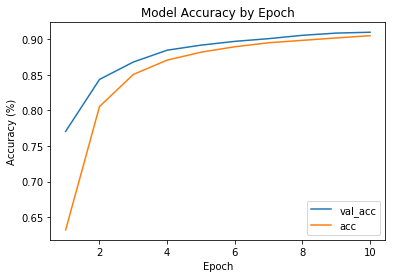

In [19]:
epochs = [i for i in range(1, 11)]
plt.figure()
plt.plot(epochs, model.history['val_acc'])
plt.plot(epochs, model.history['acc'])
plt.title("Model Accuracy by Epoch")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend(["val_acc", "acc"], loc=4)
plt.show()

**_Question:_** Do you detect any overfitting or underfitting in the model? How can you tell? Explain your answer.

Write your answer below this line:
______________________________________________________________________________________________________________________
Since accuracy for trainig and test is very similar, there does not seem to be any overfitting

The model seems to have a high overall validation accuracy score, which means the model is not underfit.  The training accuracy and testing accuracy are also very close, suggesting that the model has not yet begun to overfit the data.  However, this would likely happen if we drastically increased the size of the network, or continued training on the data for many more epochs.

## Building a Bigger Model

Now that you've cut your teeth in Keras, let's build a bigger model! For the remainder of this notebook, your task it build your own neural network in Keras from start to finish.  You do not need to repeat the data preprocessing steps done at the beginning of this notebook, since that data is still available to us. 

In the cells below, your task is to:
* Build and train a bigger model for classification on the MNIST dataset. 
* Visualize your results to check for overfitting and underfitting.

When building your MLP below, consider the following choices you'll need to make:

* How many layers will your model have?
* How many neurons will each layer have?
* What activation function will your model use?

We'll explore these topics in depth in a later lab, but it never hurts to learn through experimentation. 

**_NOTE:_**  The larger your network, the longer the training will take.  Don't build something too big if you don't have access to GPU-backed training!

In [38]:
play = Sequential()
play.add(Dense(15, activation='sigmoid',  input_shape=(784,)))
play.add(Dense(10, activation='relu'))
play.add(Dense(5,activation='sigmoid'))
play.add(Dense(10,activation='softmax'))
play.compile(loss='categorical_crossentropy', optimizer = 'SGD', metrics=['accuracy'])

In [39]:
play.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 15)                11775     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                60        
Total params: 12,050
Trainable params: 12,050
Non-trainable params: 0
_________________________________________________________________


In [28]:
play = play.fit(X_train, y_train, batch_size=32,epochs=5,verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 255us/step - loss: 2.2841 - acc: 0.1182 - val_loss: 2.2367 - val_acc: 0.1861
Epoch 2/5
60000/60000 [==============================] - 12s 208us/step - loss: 2.1189 - acc: 0.2428 - val_loss: 1.9730 - val_acc: 0.3254
Epoch 3/5
60000/60000 [==============================] - 12s 196us/step - loss: 1.8790 - acc: 0.3385 - val_loss: 1.7854 - val_acc: 0.3800
Epoch 4/5
60000/60000 [==============================] - 12s 199us/step - loss: 1.7054 - acc: 0.4192 - val_loss: 1.6091 - val_acc: 0.4461
Epoch 5/5
60000/60000 [==============================] - 13s 210us/step - loss: 1.5236 - acc: 0.4784 - val_loss: 1.4362 - val_acc: 0.5039


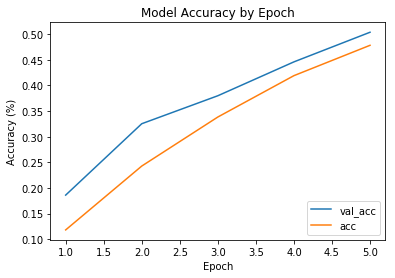

In [32]:
epochs = [i for i in range(1, 6)]
plt.figure()
plt.plot(epochs, play.history['val_acc'])
plt.plot(epochs, play.history['acc'])
plt.title("Model Accuracy by Epoch")
plt.ylabel("Accuracy (%)")
plt.xlabel("Epoch")
plt.legend(["val_acc", "acc"], loc=4)
plt.show()

## Conclusion

In this lab, we learned how to build a basic model in Keras, and gained some valuable experience with the general Deep Learning workflow. 